In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#from sys import argv

In [2]:
pd.set_option('display.max_columns', None)

# Load data:

In [3]:
df_dels_raw = pd.read_csv('../dataset3/data_main/data_DELS_noRR.csv', sep= "\;" ,header=0)# Removed NaNs of Recombination Rate
#! dataset with missing GC and cov Regionrep of Dongs data missing (12/04)

In [4]:
df_dels = df_dels_raw

display(df_dels.head())
print(df_dels.shape)

,CNV_ID,regionA_stat,regionA_end,chr_A,regionB_stat,regionB_end,chr_B,A_size_bp,B_size_bp,A_size,B_size,libraries,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
0,DGRC_DEL_2162,161068155.0,161071143.0,3,185888761.0,185892124.0,3,2988.0,3363.0,0.001296,0.001458,"siGS,mpGS",MIR,MIR,Rep_SINE,L1ME3,L1,Rep_LINE,0.0,0.0,0.057898,0.664585,0.578837,0.007347,0.000000,0.00000,False,1.832963,1.127001,0.458097,0.452006,0.000372,0.051534,0.780455,0.219545,0.000000,0.00000,0.939476,0.000000,0.117754,0.019176,0.178446,0.011941,True
1,DGRC_DEL_4355,106014292.0,106727750.0,14,106027837.0,106778411.0,14,713458.0,750574.0,0.233873,0.243180,mpGS,HERVS71-int,ERV1,Rep_LTR,HERVS71-int,ERV1,Rep_LTR,0.0,0.0,0.517093,0.514497,0.000000,0.000000,0.351421,0.36226,True,1.948549,0.302305,0.411786,0.412131,0.032821,0.032785,0.062034,0.055726,0.061266,0.05348,0.872278,0.872278,0.000000,0.000000,0.150539,0.102196,True
2,DGRC_DEL_2875,11825837.0,11829427.0,9,12082445.0,12085561.0,9,3590.0,3116.0,0.001556,0.001351,"mpGS,siGS",L1MA4,L1,Rep_LINE,MLT1H1,ERVL-MaLR,Rep_LTR,0.0,0.0,0.324513,0.334403,0.447672,1.003470,0.000000,0.00000,False,1.493005,1.107869,0.328512,0.338462,0.012140,0.013737,0.000000,1.000000,0.000000,0.00000,0.889046,0.896481,0.081797,0.227868,0.451147,0.144400,True
3,DGRC_DEL_1012,26129528.0,26133265.0,1,26138697.0,26140996.0,1,3737.0,2299.0,0.001620,0.000997,liGS,L1MCa,L1,Rep_LINE,AluJb,Alu,Rep_SINE,0.0,0.0,0.911694,0.563723,0.231521,0.175188,0.000000,0.00000,False,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.000000,0.000000,0.000000,0.00000,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,True
4,DGRC_DEL_135,80934931.0,80935787.0,1,80945300.0,80946029.0,1,856.0,729.0,0.000372,0.000316,liGS,L1MB7,L1,Rep_LINE,L1MB7,L1,Rep_LINE,0.0,0.0,0.574766,0.998628,0.171148,0.170375,0.000000,0.00000,False,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,0.000000,0.000000,0.000000,0.00000,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,True


(19821, 44)


---

---

### Check mean and std of region A and B size in bps:

In [5]:
df_Dongs = df_dels.loc[(df_dels['CNV_ID'].str.contains('NYGC'))]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]
df_DGRC = df_dels.loc[~(df_dels['CNV_ID'].str.contains('NYGC'))&(df_dels['libraries']=='liGS')]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]

In [6]:
#Save Dongs deletions for further test:

df_Dongs.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

df_Dongs['sD_pair'] = df_Dongs['sD_pair'].astype(int)
#
print(df_Dongs["target"].value_counts())
#Save it:
outPATH = "../dataset3/data_main/DELS_12_04/"
df_Dongs.to_csv(outPATH + 'refined_data_DELS_Dongs-13-04.csv', sep = ';' ,index_label=False)

True    13772
Name: target, dtype: int64


---

In [7]:
df_DGRC["target"].value_counts()

False    1998
True     1346
Name: target, dtype: int64

---

In [8]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True],df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     2692.000000
mean      3056.977340
std       1502.905781
min         25.000000
25%       2369.250000
50%       3111.500000
75%       3678.250000
max      22736.000000
dtype: float64

In [9]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False],df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     3996.000000
mean      5621.733734
std       4081.784160
min          2.000000
25%       2303.500000
50%       4960.000000
75%       8416.500000
max      27440.000000
dtype: float64

In [10]:
#A

In [11]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1346.000000
mean      3077.790490
std       1516.917541
min         25.000000
25%       2385.250000
50%       3122.000000
75%       3693.750000
max      22736.000000
Name: A_size_bp, dtype: float64

In [12]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1998.000000
mean      5627.349349
std       4093.419354
min         11.000000
25%       2360.000000
50%       4985.000000
75%       8416.000000
max      27440.000000
Name: A_size_bp, dtype: float64

In [13]:
#B

In [14]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1346.000000
mean      3036.164190
std       1489.034948
min         39.000000
25%       2356.250000
50%       3097.000000
75%       3646.500000
max      19863.000000
Name: B_size_bp, dtype: float64

In [15]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1998.000000
mean      5616.118118
std       4071.132734
min          2.000000
25%       2254.000000
50%       4942.500000
75%       8426.750000
max      27005.000000
Name: B_size_bp, dtype: float64

---

---

In [16]:
df_DGRC.isnull().values.any()
#df_DGRC.isnull().sum()

False

In [17]:
df_dels = df_DGRC

---

---

#Checking liGS mead region A and B size for Dongs data , in analisis...
l_A = df_dels['A_size_bp'].loc[df_dels['libraries']=='liGS'].tolist()
l_B = df_dels['B_size_bp'].loc[df_dels['libraries']=='liGS'].tolist()
l_A.extend(l_B)

print(np.mean(l_A)) #2857

---

print(df_dels['libraries'].unique())

df_dels['libraries'] = df_dels['libraries'].apply(lambda x: x.split(','))

# Process libraries data to onehot encoder like format:
df_libraries = pd.get_dummies(df_dels['libraries'].apply(pd.Series).stack(),prefix='librarie').sum(level=0)
display(df_libraries.head(3))

# add libraries in onehot encoder like format:
#df_dels = pd.concat([df_dels,df_libraries],axis=1)
df_dels = df_dels.join(df_libraries)


In [18]:
#display(df_dels.head(1))
#print(df_dels.shape)

In [19]:
#df_dels.loc[df_dels['CNV_ID'].isin(['DGRC_DEL_2875','DGRC_DEL_2162','DGRC_DEL_2535'])] #all ok!

#Place 'target' column in last, just in case:
df_dels.insert(len(df_dels.columns)-1, 'target', df_dels.pop('target'))

#display(df_dels.head(1))
#print(df_dels.shape)

In [20]:
df_dels.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

In [21]:
#display(df_dups.head())
#print(df_dups.shape)

# Start Feature Seletion:

Some adjustments to target:

<div class="alert alert-block alert-warning">
<b> Attention: </b> target where *{True:0,False:1}* is just in this notebook, the main dataset for the ML processe will be *{True:1,False:0}* , because it's the correct way!!!
</div>

In [22]:
df_dels["target"] = df_dels["target"].replace({True:0,False:1})
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})

In [23]:
df_dels #old 3019

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3,DGRC_DEL_1012,0.001620,0.000997,L1MCa,L1,Rep_LINE,AluJb,Alu,Rep_SINE,0.0,0.0,0.911694,0.563723,0.231521,0.175188,0.0,0.000000,False,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.000000,0.000000,0.000000,0.000000,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,0
4,DGRC_DEL_135,0.000372,0.000316,L1MB7,L1,Rep_LINE,L1MB7,L1,Rep_LINE,0.0,0.0,0.574766,0.998628,0.171148,0.170375,0.0,0.000000,False,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,0.000000,0.000000,0.000000,0.000000,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,0
5,DGRC_DEL_930,0.001610,0.001370,L1MA7,L1,Rep_LINE,LTR49-int,ERV1,Rep_LTR,0.0,0.0,0.828487,0.858183,0.430496,0.412131,0.0,0.000000,False,1.236011,2.027199,0.383065,0.331122,0.077418,0.084517,0.000000,0.000000,0.000000,0.000000,0.913537,0.913537,0.468814,0.203230,0.432882,0.515338,0
6,DGRC_DEL_697,0.001373,0.001369,THE1D,ERVL-MaLR,Rep_LTR,HAL1,L1,Rep_LINE,0.0,0.0,0.374289,0.851172,0.535198,0.358772,0.0,0.000000,False,1.022754,2.053611,0.449211,0.403165,0.026068,0.080508,0.000000,0.000000,0.000000,0.000000,0.901789,0.901789,0.062338,0.090121,0.231852,0.077273,0
7,DGRC_DEL_516,0.000598,0.000957,L1ME1,L1,Rep_LINE,LTR14B,ERVK,Rep_LTR,0.0,0.0,0.578794,0.367014,0.000398,0.067159,0.0,0.000000,False,1.454584,1.988241,0.329710,0.421670,0.061117,0.018873,0.000000,0.000000,0.000000,0.000000,0.946181,0.946181,0.027652,0.215115,0.187954,0.230456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,DGRC_DEL_1432,0.000610,0.003348,SST1,centr,Rep_Satellite,SST1,centr,Rep_Satellite,0.0,0.0,0.632740,0.803618,0.006947,0.000000,0.0,0.252842,False,0.305041,1.355400,0.568683,0.592382,0.059977,0.066641,0.000000,0.000000,0.000000,0.000000,0.868840,0.874911,0.007963,0.005866,0.015320,0.130597,0
19991,DGRC_DEL_1092,0.003078,0.000167,MER4A1,ERV1,Rep_LTR,MIRb,MIR,Rep_SINE,0.0,0.0,0.321102,0.264935,0.047828,290.956983,0.0,0.000000,False,1.772647,0.208145,0.523963,0.589744,0.025186,0.007759,0.000000,1.000000,0.000000,1.000000,0.913646,0.913646,0.000000,0.003060,0.024148,0.210723,0
19992,DGRC_DEL_1434,0.001695,0.002702,AluSg,Alu,Rep_SINE,MER1A,hAT-Charlie,Rep_DNA,0.0,0.0,0.110742,0.260695,0.160313,290.956983,0.0,0.000000,False,1.775036,0.110595,0.442656,0.535629,0.003310,0.023212,0.178261,0.821739,0.088447,0.911553,0.941108,0.941108,0.013881,0.000000,0.142151,0.111859,0
19993,DGRC_DEL_1291,0.003563,0.001648,MER5A1,hAT-Charlie,Rep_DNA,MER5A1,hAT-Charlie,Rep_DNA,0.0,0.0,0.056082,0.058127,0.000000,0.000000,1.0,1.000000,False,0.340129,2.164332,0.350637,0.363732,0.000362,0.000277,0.048555,0.951445,0.052604,0.947396,0.919415,0.919415,0.027908,0.144720,0.008674,0.122482,0


## Check for outliers:

def look_for_outliers(dataframe):
    """
    """
    target = dataframe.columns[-1]
    #display(dataframe[target])
    cols = dataframe.drop(["CNV_ID"], axis=1).columns
    for var in cols:
        data = pd.concat([dataframe[target], dataframe[var]], axis=1)
        data.plot.scatter(x=var, y=target, ylim=(-1,3), xlim=(dataframe[var].min(),dataframe[var].max()),figsize=(26, 4))

    

look_for_outliers(df_dels)

In [24]:
#look_for_outliers(df_dups)

## PCA:

In [25]:
#prepdata:
df_del_PCA = df_dels.copy()
df_del_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = df_del_PCA[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#df_del_PCA[['sD_pair_A','sD_pair_B']] = df_del_PCA[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
df_del_PCA['sD_pair'] = df_del_PCA['sD_pair'].astype(int)

#df_del_PCA = df_del_PCA.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)


df_del_PCA

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3,DGRC_DEL_1012,0.001620,0.000997,300.0,251.0,756.0,125.0,124.0,763.0,0.0,0.0,0.911694,0.563723,0.231521,0.175188,0.0,0.000000,0,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.000000,0.000000,0.000000,0.000000,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,0
4,DGRC_DEL_135,0.000372,0.000316,290.0,251.0,756.0,290.0,251.0,756.0,0.0,0.0,0.574766,0.998628,0.171148,0.170375,0.0,0.000000,0,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,0.000000,0.000000,0.000000,0.000000,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,0
5,DGRC_DEL_930,0.001610,0.001370,282.0,251.0,756.0,468.0,195.0,757.0,0.0,0.0,0.828487,0.858183,0.430496,0.412131,0.0,0.000000,0,1.236011,2.027199,0.383065,0.331122,0.077418,0.084517,0.000000,0.000000,0.000000,0.000000,0.913537,0.913537,0.468814,0.203230,0.432882,0.515338,0
6,DGRC_DEL_697,0.001373,0.001369,790.0,201.0,757.0,213.0,251.0,756.0,0.0,0.0,0.374289,0.851172,0.535198,0.358772,0.0,0.000000,0,1.022754,2.053611,0.449211,0.403165,0.026068,0.080508,0.000000,0.000000,0.000000,0.000000,0.901789,0.901789,0.062338,0.090121,0.231852,0.077273,0
7,DGRC_DEL_516,0.000598,0.000957,309.0,251.0,756.0,398.0,197.0,757.0,0.0,0.0,0.578794,0.367014,0.000398,0.067159,0.0,0.000000,0,1.454584,1.988241,0.329710,0.421670,0.061117,0.018873,0.000000,0.000000,0.000000,0.000000,0.946181,0.946181,0.027652,0.215115,0.187954,0.230456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,DGRC_DEL_1432,0.000610,0.003348,774.0,825.0,764.0,774.0,825.0,764.0,0.0,0.0,0.632740,0.803618,0.006947,0.000000,0.0,0.252842,0,0.305041,1.355400,0.568683,0.592382,0.059977,0.066641,0.000000,0.000000,0.000000,0.000000,0.868840,0.874911,0.007963,0.005866,0.015320,0.130597,0
19991,DGRC_DEL_1092,0.003078,0.000167,580.0,195.0,757.0,660.0,657.0,763.0,0.0,0.0,0.321102,0.264935,0.047828,290.956983,0.0,0.000000,0,1.772647,0.208145,0.523963,0.589744,0.025186,0.007759,0.000000,1.000000,0.000000,1.000000,0.913646,0.913646,0.000000,0.003060,0.024148,0.210723,0
19992,DGRC_DEL_1434,0.001695,0.002702,132.0,124.0,763.0,538.0,829.0,754.0,0.0,0.0,0.110742,0.260695,0.160313,290.956983,0.0,0.000000,0,1.775036,0.110595,0.442656,0.535629,0.003310,0.023212,0.178261,0.821739,0.088447,0.911553,0.941108,0.941108,0.013881,0.000000,0.142151,0.111859,0
19993,DGRC_DEL_1291,0.003563,0.001648,609.0,829.0,754.0,609.0,829.0,754.0,0.0,0.0,0.056082,0.058127,0.000000,0.000000,1.0,1.000000,0,0.340129,2.164332,0.350637,0.363732,0.000362,0.000277,0.048555,0.951445,0.052604,0.947396,0.919415,0.919415,0.027908,0.144720,0.008674,0.122482,0


In [26]:
# libraries columns has to be removed for PCA R script:
#df_del_PCA.drop(['librarie_liGS','librarie_mpGS','librarie_siGS'], axis=1, inplace=True)

In [27]:
#Save it:
outPATH = "./datasetPCA/noRR_deletions/"
df_del_PCA.to_csv(outPATH + 'del_PCA_liGS_noRR.csv', sep = ';' ,index_label=False)

In [28]:
#/

In [29]:
from sklearn.decomposition import PCA

In [30]:
#X

## TRUE

In [31]:
X = df_dels.loc[df_dels["target"] == 0]
y =  df_dels["target"].loc[df_dels["target"] == 0]

X = X.drop("target",axis=1)

X = X.drop("CNV_ID",axis=1)
##X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
##X['sD_pair'] = X['sD_pair'].astype(int)

X = X.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)

# Scale data befor applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)


# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)
'''
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
'''

(1346, 2)


'\npca = PCA(n_components=2)\npca.fit(X)\nprint(pca.explained_variance_ratio_)\n'

In [32]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.06703849, -0.07273804,  0.17119936,  0.15372904, -0.3281624 ,
        -0.29705478, -0.01547027,  0.09515482,  0.12352694,  0.11411548,
         0.16891772, -0.31404468,  0.32750957,  0.33806925, -0.28210101,
        -0.23817947,  0.24817821,  0.13303899,  0.2109434 ,  0.14632501,
        -0.18685105, -0.1863898 ,  0.00846534,  0.02646029, -0.04249098,
        -0.03623997],
       [-0.12220659, -0.10088805,  0.22541622,  0.20808221,  0.04007017,
         0.02615606, -0.00259252, -0.0419581 ,  0.39095314,  0.3862834 ,
        -0.29691636,  0.17270293,  0.12864067,  0.11920418,  0.10274092,
         0.08474992,  0.23770468, -0.24697164,  0.20790031, -0.23890904,
         0.29619633,  0.29723528, -0.03904852, -0.08414465,  0.05638752,
         0.05014022]])

Text(0, 0.5, 'pc2')

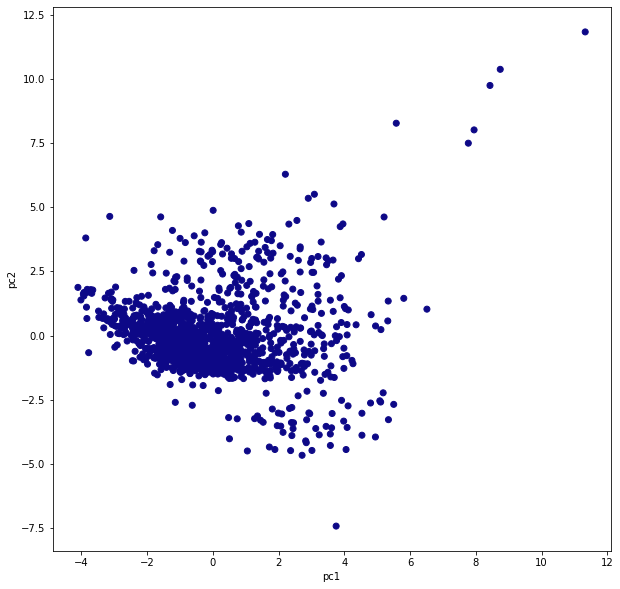

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

## FALSE:

In [34]:
X = df_dels.loc[df_dels["target"] == 1]
y =  df_dels["target"].loc[df_dels["target"] == 1]

X = X.drop("target",axis=1)

X = X.drop("CNV_ID",axis=1)
##X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
#X[['sD_pair_A','sD_pair_B']] = X[['sD_pair_A','sD_pair_B']].stack().rank(method='dense').unstack()
##X['sD_pair'] = X['sD_pair'].astype(int)

X = X.drop(['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class','sD_pair'],axis=1)

# Scale data befor applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)


# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)
'''
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
'''

(1998, 2)


'\npca = PCA(n_components=2)\npca.fit(X)\nprint(pca.explained_variance_ratio_)\n'

Text(0, 0.5, 'pc2')

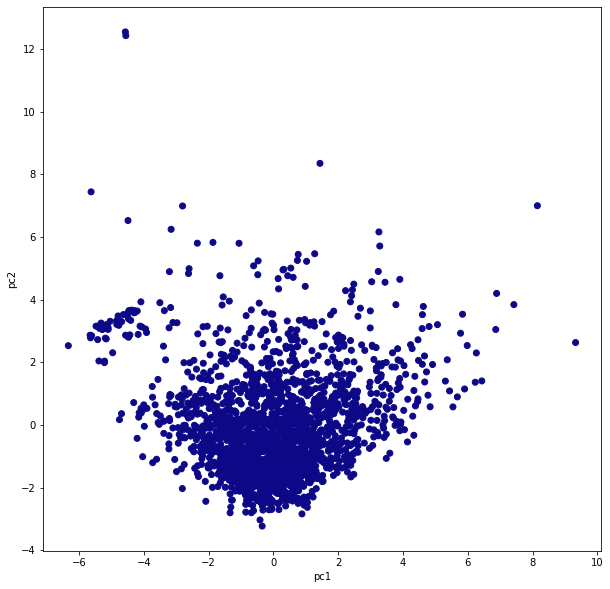

In [35]:
#1
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

### Using PCA R script:

In [36]:
from IPython.display import Image
from IPython.core.display import HTML 

TP deletions:

In [42]:
Image(url= "./datasetPCA/noRR_deletions/tp_scaled.png")

In [43]:
Image(url= "./datasetPCA/noRR_deletions/tp_labels.png") #old

FP deletions:

In [44]:
Image(url= "./datasetPCA/noRR_deletions/fp_scaled.png")

In [45]:
Image(url= "./datasetPCA/noRR_deletions/fp_labels.png")

In [46]:
Image(url= "./datasetPCA/noRR_deletions/zoom_fp_labels.png")

# Remove outliers:

In [47]:
Image(url= "./datasetPCA/noRR_deletions/tp_scaled_dots.png")

In [48]:
Image(url= "./datasetPCA/noRR_deletions/tp_labels_marked.png")

In [49]:
#________________________________

In [50]:
Image(url= "./datasetPCA/noRR_deletions/fp_scaled_dots.png")

In [51]:
Image(url= "./datasetPCA/noRR_deletions/fp_labels_marked.png")

In [52]:
#Outliers to remove:
l_outliersIDs = ["DGRC_DEL_60","DGRC_DEL_240",
                 "fp_296","fp_2050","fp_1129"]
#df_dels[df_dels['CNV_ID'].isin(l_outliersIDs)]

In [53]:
df_dels = df_dels[~df_dels['CNV_ID'].isin(l_outliersIDs)]

# Save current dataset:

<div class="alert alert-block alert-warning">
<b> Attention: </b> target where *{True:0,False:1}* is just in this notebook, the main dataset for the ML processe will be *{True:1,False:0}* , because it's the correct way!!!
</div>

In [54]:
#df_dels["target"] = df_dels["target"].replace({True:0,False:1})
df_dels["target"] = df_dels["target"].replace({0:True,1:False}) #resverse it
#df_dels["target"] = df_dels["target"].astype(int)
#df_dups["target"] = df_dups["target"].replace({True:0,False:1})

In [55]:
#df_dels.loc[df_dels.target==1].head(1)

In [56]:
#df_dels.loc[df_dels.target==0].head(1)

***

In [57]:
df_dels["target"] = df_dels["target"].astype(int)

In [58]:
df_dels[['CNV_ID','target']].loc[df_dels.target==1].head(1)

,CNV_ID,target
3,DGRC_DEL_1012,1


In [59]:
df_dels[['CNV_ID','target']].loc[df_dels.target==0].head(1)

,CNV_ID,target
1383,fp_401,0


***

In [60]:
#SAVE it!!!
outPATH = "../dataset3/data_main/"
df_dels.to_csv(outPATH + 'refined_data_DELS_liGS_noRR-23-05.csv', sep = ';' ,index_label=False)

# -----------------------------------------------------------------------------

# Feature Importance:

Feature: 0 A_size, Score: 0.16145
Feature: 1 B_size, Score: 0.17125
Feature: 2 A_region_name, Score: 0.02450
Feature: 3 A_region_family, Score: 0.01406
Feature: 4 A_region_class, Score: 0.00914
Feature: 5 B_region_name, Score: 0.02373
Feature: 6 B_region_family, Score: 0.01607
Feature: 7 B_region_class, Score: 0.01124
Feature: 8 A_repitiveRegion_dist, Score: 0.00194
Feature: 9 B_repitiveRegion_dist, Score: 0.00233
Feature: 10 A_cov_repRegion, Score: 0.02771
Feature: 11 B_cov_repRegion, Score: 0.02337
Feature: 12 A_SegDup_dist, Score: 0.03059
Feature: 13 B_SegDup_dist, Score: 0.02831
Feature: 14 A_cov_segDup, Score: 0.00773
Feature: 15 B_cov_segDup, Score: 0.00623
Feature: 16 sD_pair, Score: 0.00111
Feature: 17 dist_Centromere, Score: 0.02980
Feature: 18 dist_Telomere, Score: 0.02917
Feature: 19 GC_perc_A, Score: 0.02674
Feature: 20 GC_perc_B, Score: 0.02563
Feature: 21 Dust_A, Score: 0.02886
Feature: 22 Dust_B, Score: 0.02589
Feature: 23 A_cov_Exons, Score: 0.01892
Feature: 24 A_cov_In

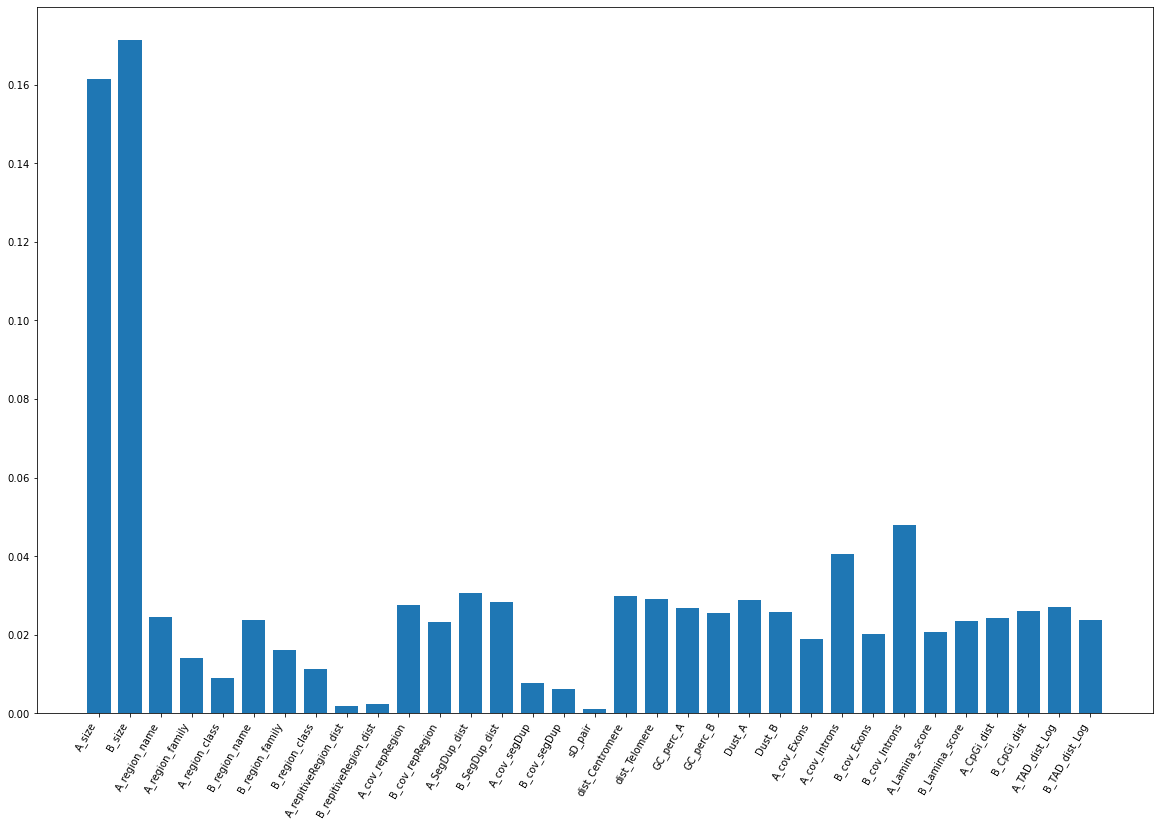

In [61]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = df_dels.drop(["target","CNV_ID"], axis = 1), df_dels["target"]

#Must adapt caregorical:
X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']] = X[['A_region_name','A_region_family','A_region_class','B_region_name','B_region_family','B_region_class']].stack().rank(method='dense').unstack()
X['sD_pair'] = X['sD_pair'].astype(int)
list_features = X.columns.to_list()

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s %s, Score: %.5f' % (i,list_features[i],v))
# plot feature importance
pyplot.figure(figsize=(20, 13))
pyplot.bar([x for x in range(len(importance))], importance,tick_label=X.columns,width = 0.75 )
#pyplot.bar([x for x in range(list_features)], importance)
pyplot.xticks(rotation=60,horizontalalignment='right')
pyplot.rcParams.update({'font.size': 18})

pyplot.show()

# Since librarie_mpGS column has no importance score: #because theres no FP deletion from the librarie_mpGS.
#df_dels.loc[df_dels['librarie_mpGS']==1]

#by the results, remove librarie_mpGS and its rows:

#Drop the rows:
#df_dels[].loc[df_dels['librarie_mpGS']==1]
to_drop = df_dels.loc[df_dels['CNV_ID'].isin(['DGRC_DEL_2162','DGRC_DEL_4358','DGRC_DEL_2535','DGRC_DEL_2875'])].index
df_dels.drop(to_drop, inplace=True)


#Drop the coluns
df_dels.drop(['librarie_mpGS'], axis=1, inplace=True)



In [62]:
#df_dels.loc[df_dels['CNV_ID'].isin(['DGRC_DEL_2162','DGRC_DEL_4358','DGRC_DEL_2535','DGRC_DEL_2875'])]
df_dels.head(2)

,CNV_ID,A_size,B_size,A_region_name,A_region_family,A_region_class,B_region_name,B_region_family,B_region_class,A_repitiveRegion_dist,B_repitiveRegion_dist,A_cov_repRegion,B_cov_repRegion,A_SegDup_dist,B_SegDup_dist,A_cov_segDup,B_cov_segDup,sD_pair,dist_Centromere,dist_Telomere,GC_perc_A,GC_perc_B,Dust_A,Dust_B,A_cov_Exons,A_cov_Introns,B_cov_Exons,B_cov_Introns,A_Lamina_score,B_Lamina_score,A_CpGi_dist,B_CpGi_dist,A_TAD_dist_Log,B_TAD_dist_Log,target
3,DGRC_DEL_1012,0.001620,0.000997,L1MCa,L1,Rep_LINE,AluJb,Alu,Rep_SINE,0.0,0.0,0.911694,0.563723,0.231521,0.175188,0.0,0.0,False,1.984803,1.433342,0.426738,0.448696,0.094375,0.037602,0.0,0.0,0.0,0.0,0.899469,0.892851,0.007365,0.008736,0.037238,0.126782,1
4,DGRC_DEL_135,0.000372,0.000316,L1MB7,L1,Rep_LINE,L1MB7,L1,Rep_LINE,0.0,0.0,0.574766,0.998628,0.171148,0.170375,0.0,0.0,False,1.620705,1.913421,0.367442,0.317007,0.036770,0.110807,0.0,0.0,0.0,0.0,0.925017,0.925017,0.205131,0.268176,0.239282,0.196997,1


In [63]:
#SAVE it!!!
outPATH = "./dataset3/data_main/"
#df_dels.to_csv(outPATH + 'refined_data_DELS.csv', sep = ';' ,index_label=False)

### Make dataset by removing the feature with the lowest importance: 

**not in use!!!**

In [52]:
#df_superR_dels = df_dels
#low_impfeatures = ['A_repitiveRegion_dist','B_repitiveRegion_dist',
#                       'A_cov_segDup','B_cov_segDup',
#                       'sD_pair_A','sD_pair_B',
#                       'A_cov_Exons','A_cov_Introns',
#                       'B_cov_Exons','B_cov_Introns']
#df_superR_dels  = df_superR_dels.drop(low_impfeatures, axis = 1)

In [53]:
#SAVE it!!!
#outPATH = "./dataset3/data_main/"


#df_superR_dels.to_csv(outPATH + 'super_refined_data_DELS.csv', sep = ';' ,index_label=False)

***

### Check mean and std of region A and B size in bps:

In [64]:
df_DGRC = pd.read_csv('../dataset3/data_main/data_DELS_noRR.csv', sep= "\;" ,header=0)

In [65]:
df_DGRC = df_DGRC.loc[~(df_DGRC['CNV_ID'].str.contains('NYGC'))&(df_DGRC['libraries']=='liGS')]#[['CNV_ID','A_size_bp','B_size_bp','libraries','target']]

In [66]:
df_DGRC["target"].value_counts()

False    1998
True     1346
Name: target, dtype: int64

In [67]:
#Outliers to decided to remove:
l_outliersIDs = ["DGRC_DEL_60","DGRC_DEL_240",
                 "fp_296","fp_2050","fp_1129"]
#df_dels[df_dels['CNV_ID'].isin(l_outliersIDs)]
df_DGRC = df_DGRC[~df_DGRC['CNV_ID'].isin(l_outliersIDs)]

In [68]:
df_DGRC["target"].value_counts()

False    1995
True     1344
Name: target, dtype: int64

---

In [69]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True],df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     2688.000000
mean      3056.430060
std       1503.856412
min         25.000000
25%       2366.000000
50%       3110.500000
75%       3678.250000
max      22736.000000
dtype: float64

In [70]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False],df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     3990.000000
mean      5624.892231
std       4083.030499
min          2.000000
25%       2312.250000
50%       4963.500000
75%       8422.500000
max      27440.000000
dtype: float64

In [71]:
#A

In [72]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1344.000000
mean      3076.963542
std       1517.894914
min         25.000000
25%       2382.500000
50%       3121.000000
75%       3694.000000
max      22736.000000
Name: A_size_bp, dtype: float64

In [73]:
pd.concat([df_DGRC['A_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1995.000000
mean      5630.446617
std       4094.700771
min         11.000000
25%       2373.500000
50%       4990.000000
75%       8417.000000
max      27440.000000
Name: A_size_bp, dtype: float64

In [74]:
#B

In [75]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==True]]).describe()

count     1344.000000
mean      3035.896577
std       1489.967567
min         39.000000
25%       2353.000000
50%       3097.000000
75%       3643.500000
max      19863.000000
Name: B_size_bp, dtype: float64

In [76]:
pd.concat([df_DGRC['B_size_bp'].loc[df_DGRC['target']==False]]).describe()

count     1995.000000
mean      5619.337845
std       4072.345837
min          2.000000
25%       2254.000000
50%       4949.000000
75%       8441.500000
max      27005.000000
Name: B_size_bp, dtype: float64

---

In [77]:
df_DGRC.drop(['libraries','regionA_stat', 'regionA_end', 'chr_A',
       'regionB_stat', 'regionB_end', 'chr_B','A_size_bp','B_size_bp'], axis=1, inplace=True)

In [78]:
#SAVE it!!!
outPATH = "../dataset3/data_main/DELS_12_04/"
df_DGRC.to_csv(outPATH + 'refined_data_DELS_liGS_noRR-23-05.csv', sep = ';' ,index_label=False)